In [1]:
import warnings
warnings.filterwarnings('ignore')
from ba_code.data_processing_and_analysis.data_analyzer import DataAnalyzer, AnalyzerOption, DecomposeOption
from ba_code.data_processing_and_analysis.google_and_tripadvisor.restaurant_review_data_uri import \
    TripadvisorRestaurantReviewDataUri, GoogleRestaurantReviewDataUri, RestaurantReviewDataType
from ba_code.data_processing_and_analysis.prognolite.prognolite_restaurant_constants import \
    Restaurant

dataAnalyzer = DataAnalyzer()

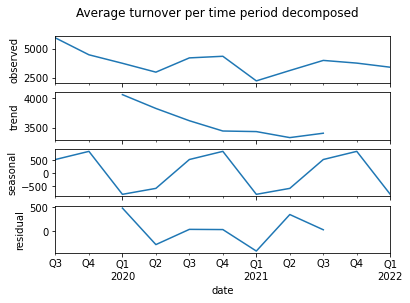

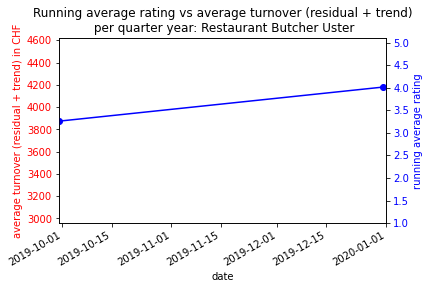

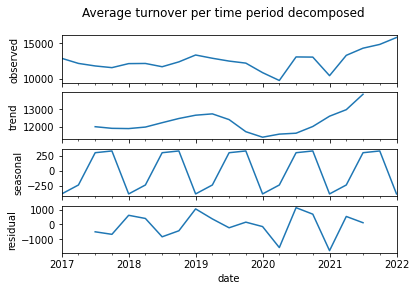

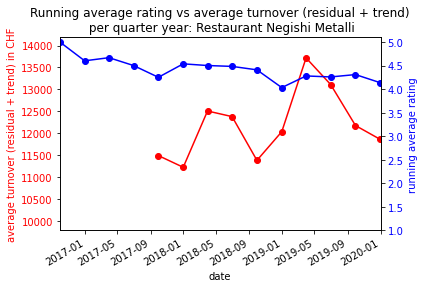

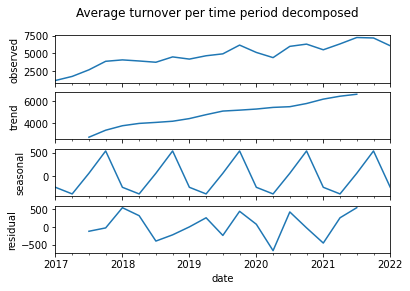

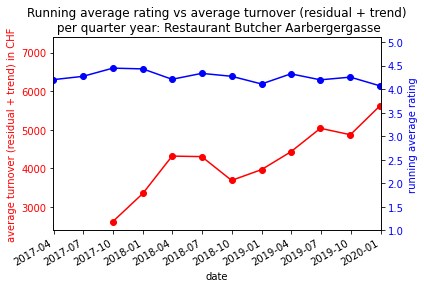

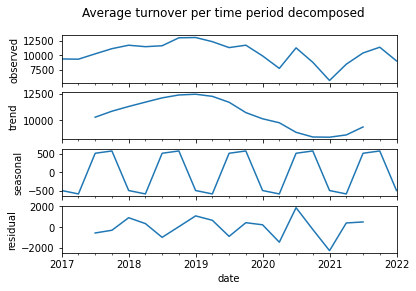

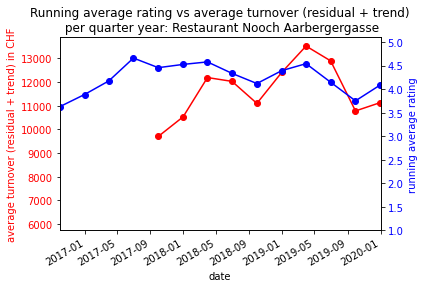

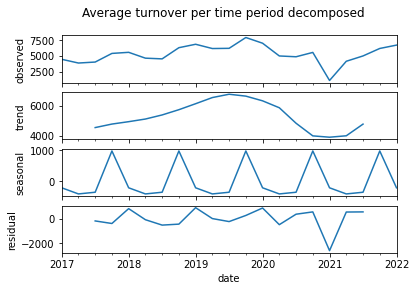

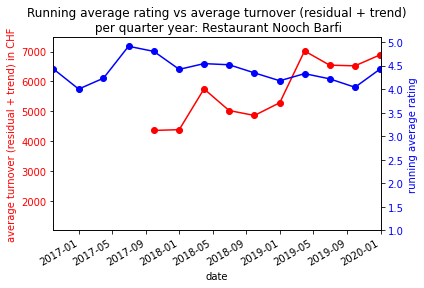

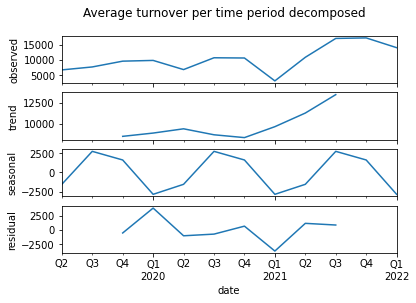

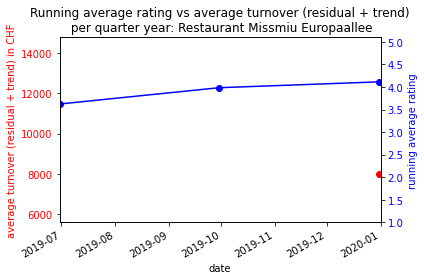

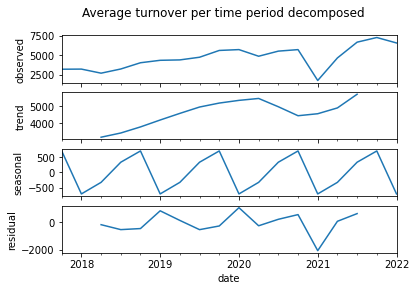

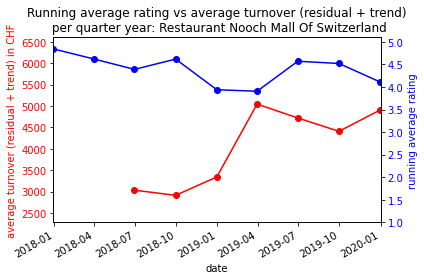

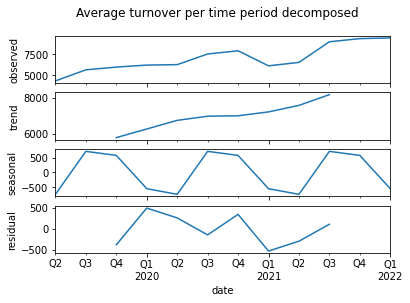

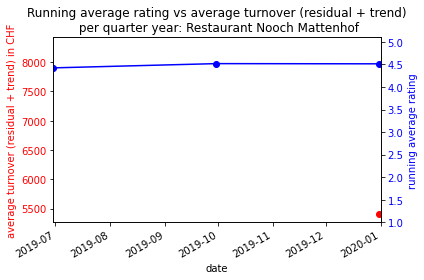

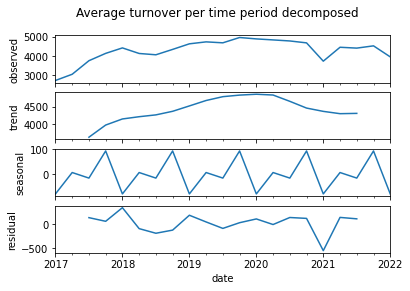

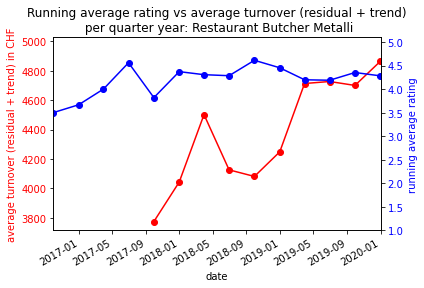

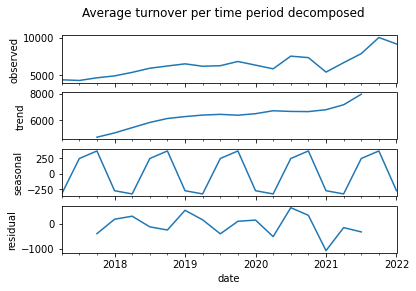

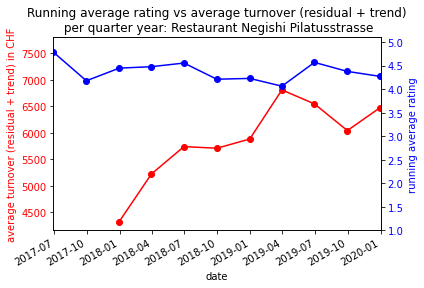

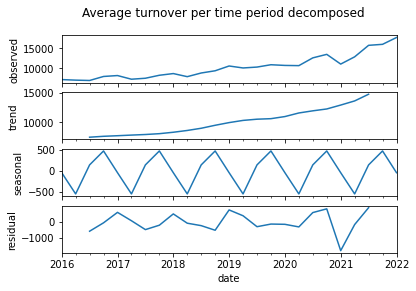

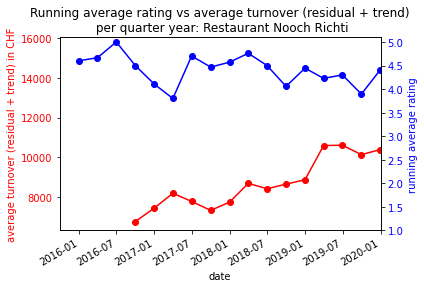

Couldn't perform decompose and generate plot for fwg-outback-stad


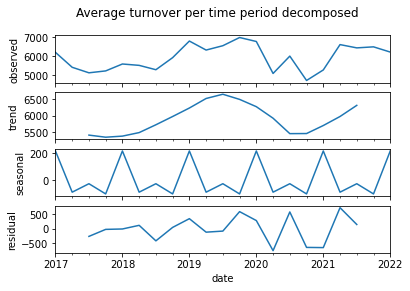

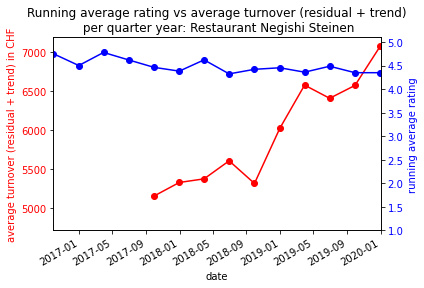

Couldn't perform decompose and generate plot for fwg-nooch-uster


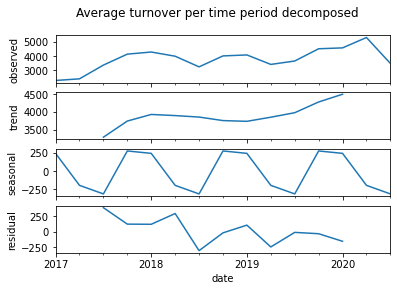

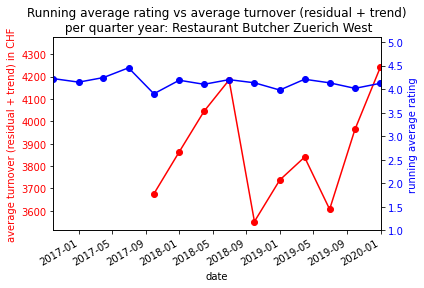

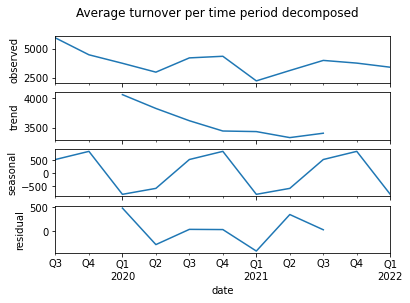

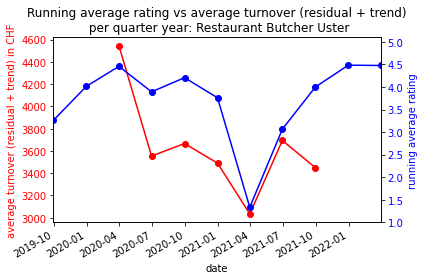

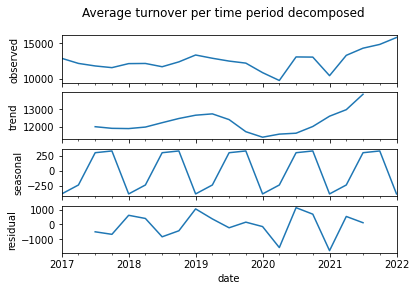

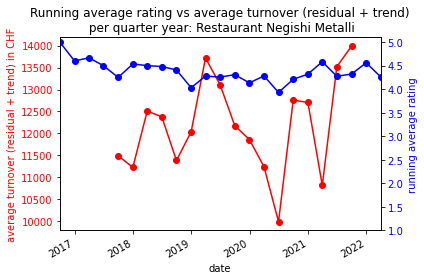

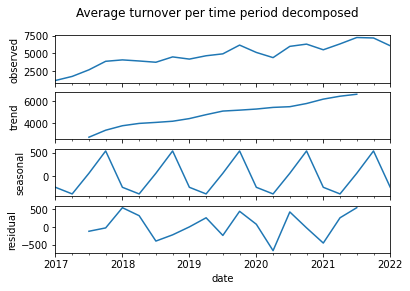

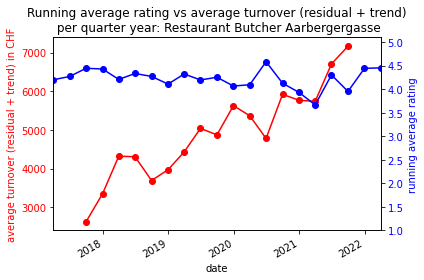

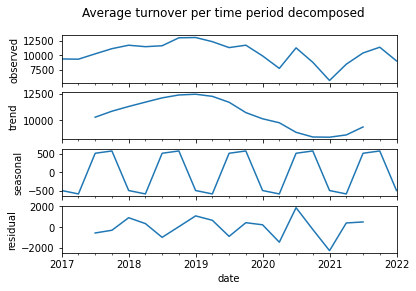

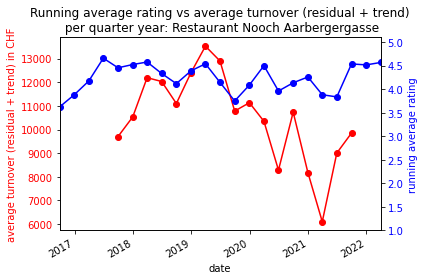

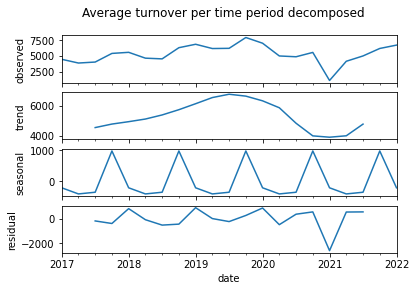

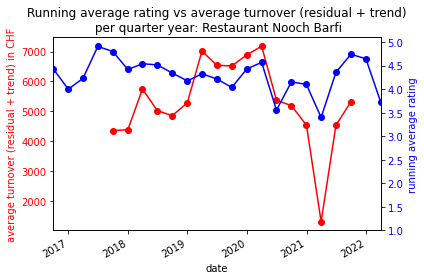

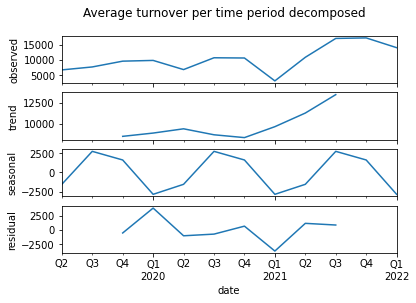

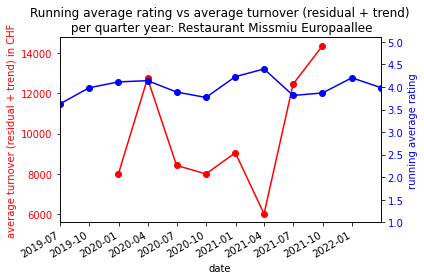

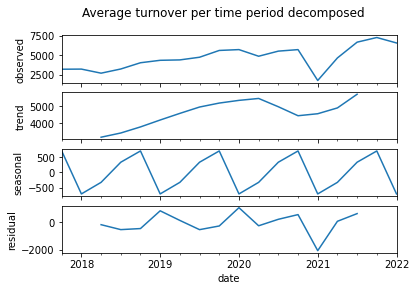

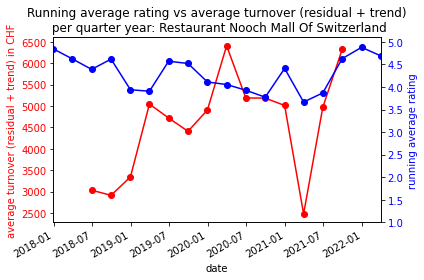

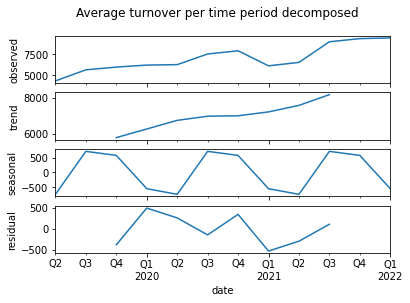

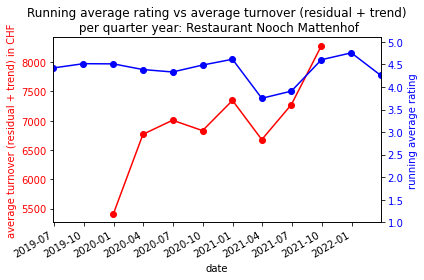

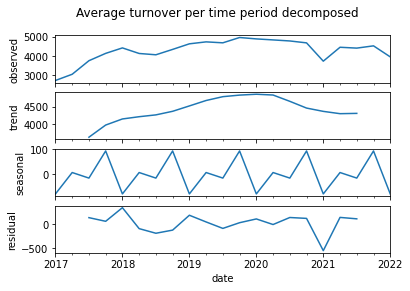

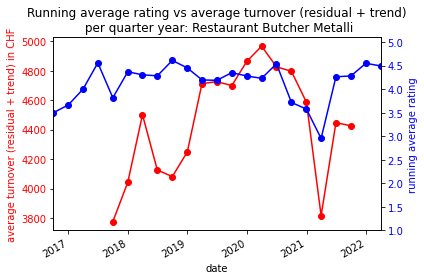

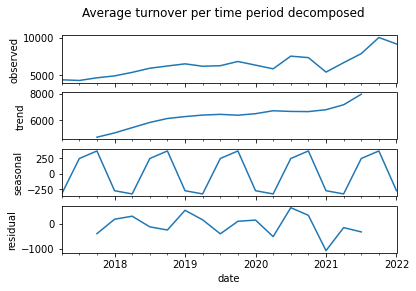

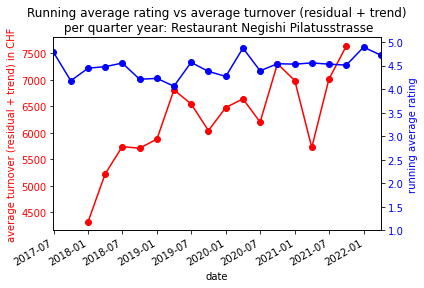

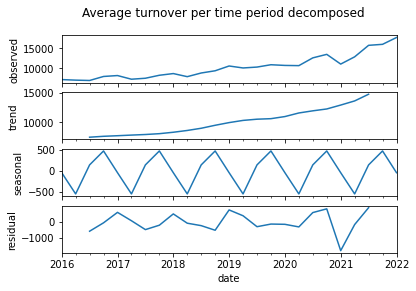

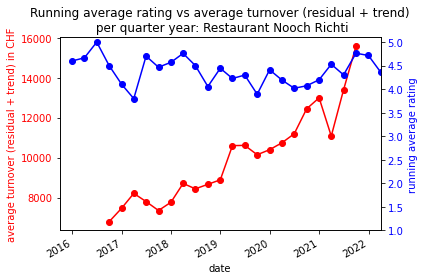

Couldn't perform decompose and generate plot for fwg-outback-stad


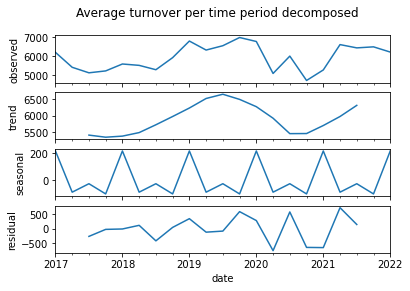

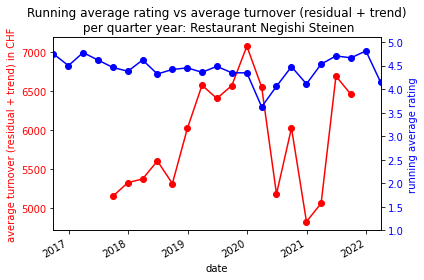

Couldn't perform decompose and generate plot for fwg-nooch-uster


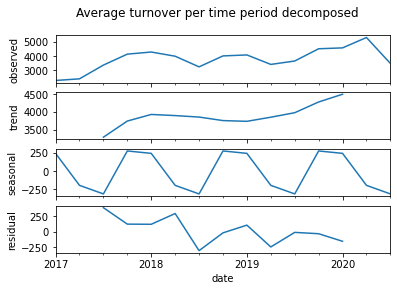

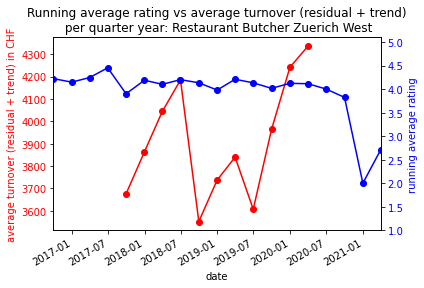

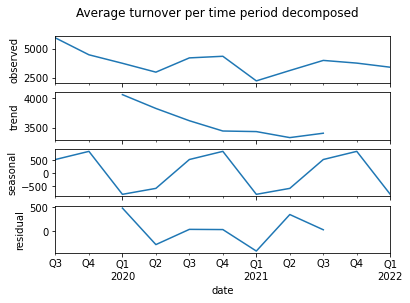


Restaurant: fwg-butcher-uster

Pearson correlation:
                                residual_plus_trend  \
residual_plus_trend                             NaN   
average_rating_per_time_period                  NaN   

                                average_rating_per_time_period  
residual_plus_trend                                        NaN  
average_rating_per_time_period                             NaN  

Spearman correlation:
                                residual_plus_trend  \
residual_plus_trend                             NaN   
average_rating_per_time_period                  NaN   

                                average_rating_per_time_period  
residual_plus_trend                                        NaN  
average_rating_per_time_period                             NaN  


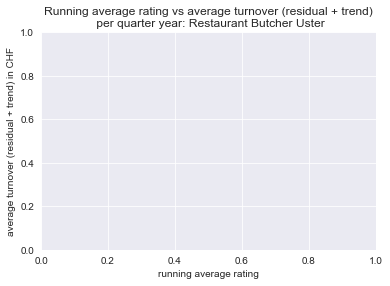

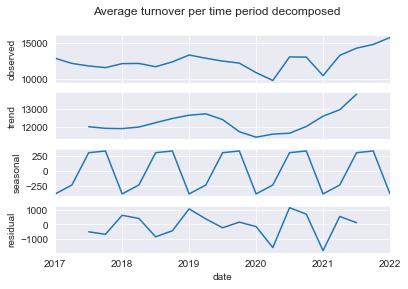


Restaurant: fwg-negishi-metalli

Pearson correlation:
                                residual_plus_trend  \
residual_plus_trend                         1.00000   
average_rating_per_time_period             -0.13633   

                                average_rating_per_time_period  
residual_plus_trend                                   -0.13633  
average_rating_per_time_period                         1.00000  

Spearman correlation:
                                residual_plus_trend  \
residual_plus_trend                        1.000000   
average_rating_per_time_period            -0.078788   

                                average_rating_per_time_period  
residual_plus_trend                                  -0.078788  
average_rating_per_time_period                        1.000000  


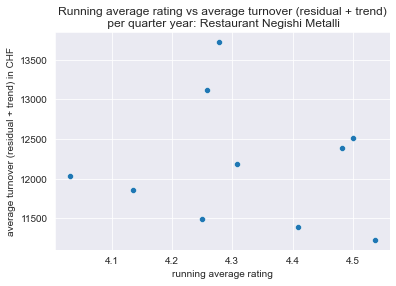

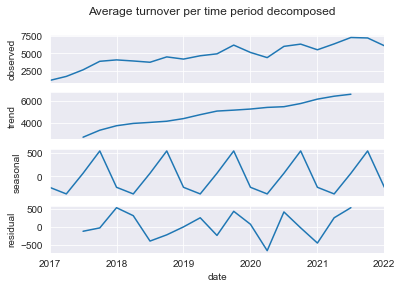


Restaurant: fwg-butcher-aarbergergasse

Pearson correlation:
                                residual_plus_trend  \
residual_plus_trend                        1.000000   
average_rating_per_time_period            -0.744736   

                                average_rating_per_time_period  
residual_plus_trend                                  -0.744736  
average_rating_per_time_period                        1.000000  

Spearman correlation:
                                residual_plus_trend  \
residual_plus_trend                        1.000000   
average_rating_per_time_period            -0.709091   

                                average_rating_per_time_period  
residual_plus_trend                                  -0.709091  
average_rating_per_time_period                        1.000000  


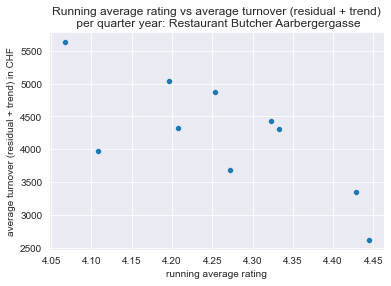

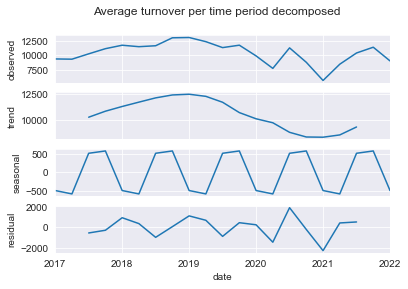


Restaurant: fwg-nooch-aarbergergasse

Pearson correlation:
                                residual_plus_trend  \
residual_plus_trend                        1.000000   
average_rating_per_time_period             0.224292   

                                average_rating_per_time_period  
residual_plus_trend                                   0.224292  
average_rating_per_time_period                        1.000000  

Spearman correlation:
                                residual_plus_trend  \
residual_plus_trend                        1.000000   
average_rating_per_time_period             0.236364   

                                average_rating_per_time_period  
residual_plus_trend                                   0.236364  
average_rating_per_time_period                        1.000000  


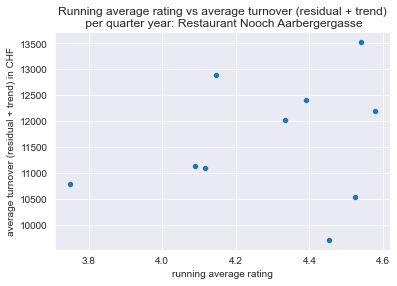

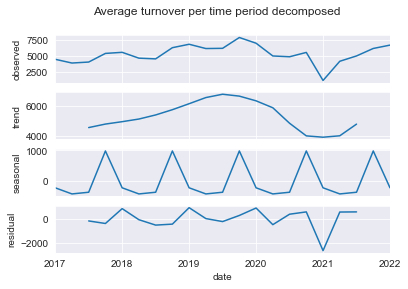


Restaurant: fwg-nooch-barfi

Pearson correlation:
                                residual_plus_trend  \
residual_plus_trend                        1.000000   
average_rating_per_time_period            -0.513802   

                                average_rating_per_time_period  
residual_plus_trend                                  -0.513802  
average_rating_per_time_period                        1.000000  

Spearman correlation:
                                residual_plus_trend  \
residual_plus_trend                        1.000000   
average_rating_per_time_period            -0.430303   

                                average_rating_per_time_period  
residual_plus_trend                                  -0.430303  
average_rating_per_time_period                        1.000000  


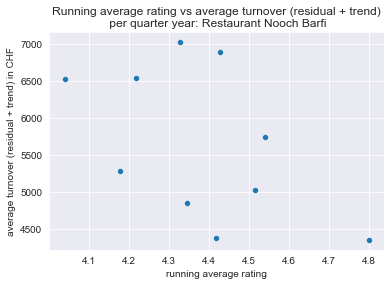

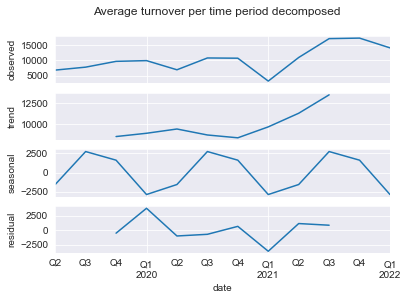


Restaurant: fwg-missmiu-europaallee

Pearson correlation:
                                residual_plus_trend  \
residual_plus_trend                             NaN   
average_rating_per_time_period                  NaN   

                                average_rating_per_time_period  
residual_plus_trend                                        NaN  
average_rating_per_time_period                             NaN  

Spearman correlation:
                                residual_plus_trend  \
residual_plus_trend                             NaN   
average_rating_per_time_period                  NaN   

                                average_rating_per_time_period  
residual_plus_trend                                        NaN  
average_rating_per_time_period                             NaN  


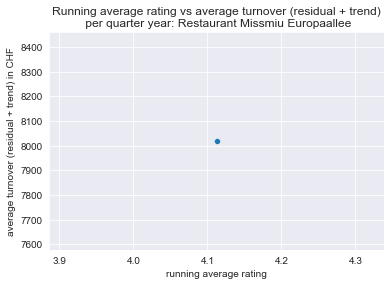

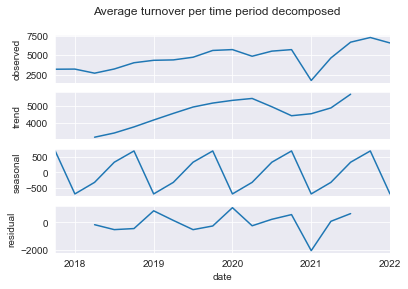


Restaurant: fwg-nooch-mallofSwitzerland

Pearson correlation:
                                residual_plus_trend  \
residual_plus_trend                        1.000000   
average_rating_per_time_period            -0.292473   

                                average_rating_per_time_period  
residual_plus_trend                                  -0.292473  
average_rating_per_time_period                        1.000000  

Spearman correlation:
                                residual_plus_trend  \
residual_plus_trend                        1.000000   
average_rating_per_time_period            -0.571429   

                                average_rating_per_time_period  
residual_plus_trend                                  -0.571429  
average_rating_per_time_period                        1.000000  


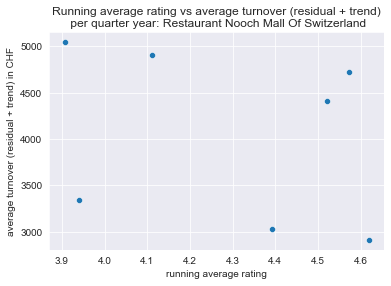

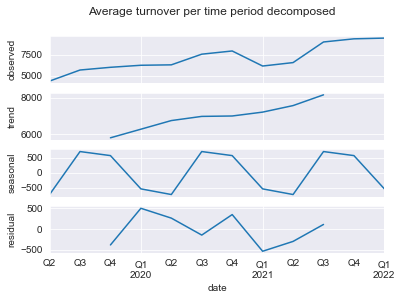


Restaurant: fwg-nooch-mattenhof

Pearson correlation:
                                residual_plus_trend  \
residual_plus_trend                             NaN   
average_rating_per_time_period                  NaN   

                                average_rating_per_time_period  
residual_plus_trend                                        NaN  
average_rating_per_time_period                             NaN  

Spearman correlation:
                                residual_plus_trend  \
residual_plus_trend                             NaN   
average_rating_per_time_period                  NaN   

                                average_rating_per_time_period  
residual_plus_trend                                        NaN  
average_rating_per_time_period                             NaN  


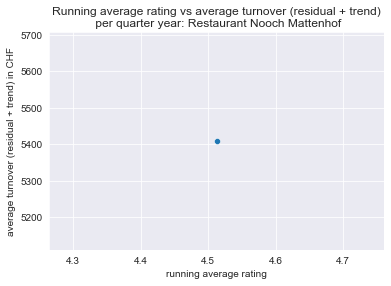

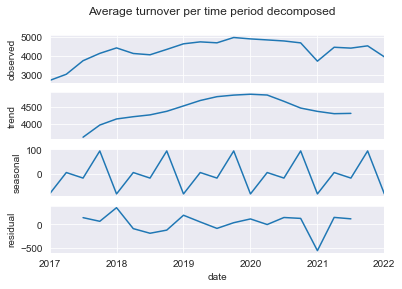


Restaurant: fwg-butcher-metalli

Pearson correlation:
                                residual_plus_trend  \
residual_plus_trend                        1.000000   
average_rating_per_time_period             0.136258   

                                average_rating_per_time_period  
residual_plus_trend                                   0.136258  
average_rating_per_time_period                        1.000000  

Spearman correlation:
                                residual_plus_trend  \
residual_plus_trend                        1.000000   
average_rating_per_time_period            -0.284848   

                                average_rating_per_time_period  
residual_plus_trend                                  -0.284848  
average_rating_per_time_period                        1.000000  


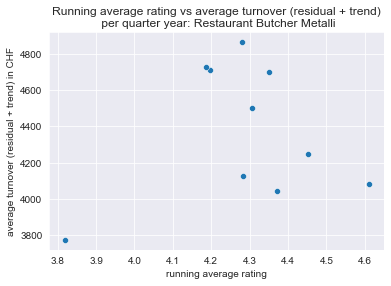

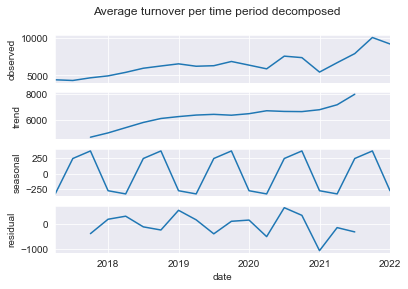


Restaurant: fwg-negishi-pilatusstrasse

Pearson correlation:
                                residual_plus_trend  \
residual_plus_trend                         1.00000   
average_rating_per_time_period             -0.38422   

                                average_rating_per_time_period  
residual_plus_trend                                   -0.38422  
average_rating_per_time_period                         1.00000  

Spearman correlation:
                                residual_plus_trend  \
residual_plus_trend                        1.000000   
average_rating_per_time_period            -0.216667   

                                average_rating_per_time_period  
residual_plus_trend                                  -0.216667  
average_rating_per_time_period                        1.000000  


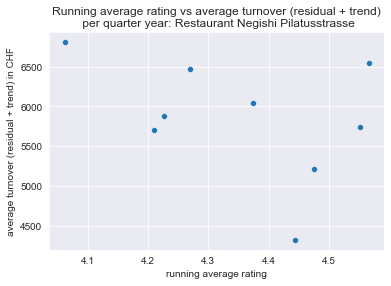

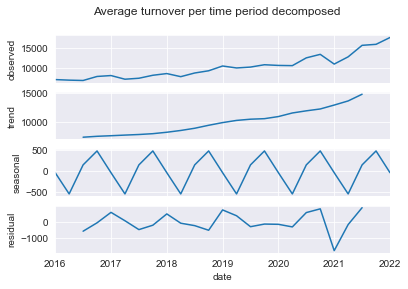


Restaurant: fwg-nooch-richti

Pearson correlation:
                                residual_plus_trend  \
residual_plus_trend                        1.000000   
average_rating_per_time_period            -0.268255   

                                average_rating_per_time_period  
residual_plus_trend                                  -0.268255  
average_rating_per_time_period                        1.000000  

Spearman correlation:
                                residual_plus_trend  \
residual_plus_trend                        1.000000   
average_rating_per_time_period            -0.305831   

                                average_rating_per_time_period  
residual_plus_trend                                  -0.305831  
average_rating_per_time_period                        1.000000  


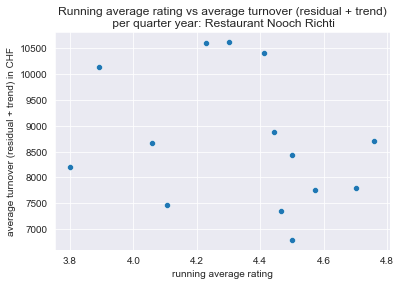

Couldn't perform decompose and compute correlation for fwg-outback-stad


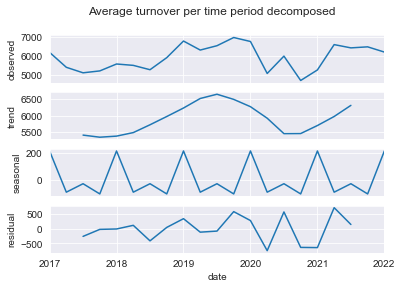


Restaurant: fwg-negishi-steinen

Pearson correlation:
                                residual_plus_trend  \
residual_plus_trend                        1.000000   
average_rating_per_time_period            -0.407157   

                                average_rating_per_time_period  
residual_plus_trend                                  -0.407157  
average_rating_per_time_period                        1.000000  

Spearman correlation:
                                residual_plus_trend  \
residual_plus_trend                        1.000000   
average_rating_per_time_period            -0.443771   

                                average_rating_per_time_period  
residual_plus_trend                                  -0.443771  
average_rating_per_time_period                        1.000000  


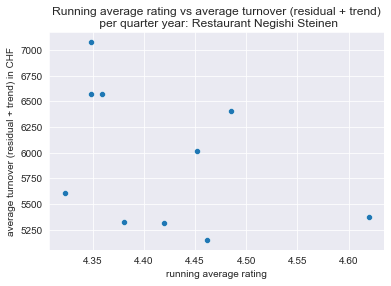

Couldn't perform decompose and compute correlation for fwg-nooch-uster


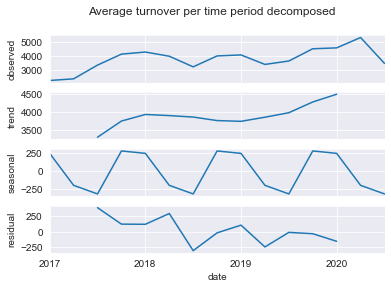


Restaurant: fwg-butcher-zuerichWest

Pearson correlation:
                                residual_plus_trend  \
residual_plus_trend                        1.000000   
average_rating_per_time_period             0.294332   

                                average_rating_per_time_period  
residual_plus_trend                                   0.294332  
average_rating_per_time_period                        1.000000  

Spearman correlation:
                                residual_plus_trend  \
residual_plus_trend                        1.000000   
average_rating_per_time_period             0.115152   

                                average_rating_per_time_period  
residual_plus_trend                                   0.115152  
average_rating_per_time_period                        1.000000  


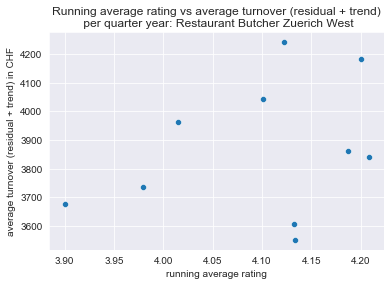

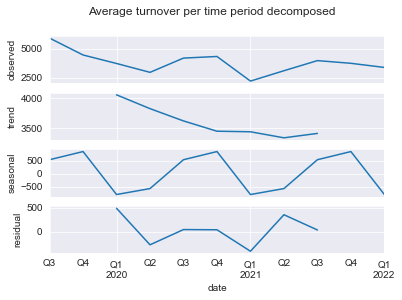


Restaurant: fwg-butcher-uster

Pearson correlation:
                                residual_plus_trend  \
residual_plus_trend                        1.000000   
average_rating_per_time_period             0.689497   

                                average_rating_per_time_period  
residual_plus_trend                                   0.689497  
average_rating_per_time_period                        1.000000  

Spearman correlation:
                                residual_plus_trend  \
residual_plus_trend                        1.000000   
average_rating_per_time_period             0.535714   

                                average_rating_per_time_period  
residual_plus_trend                                   0.535714  
average_rating_per_time_period                        1.000000  


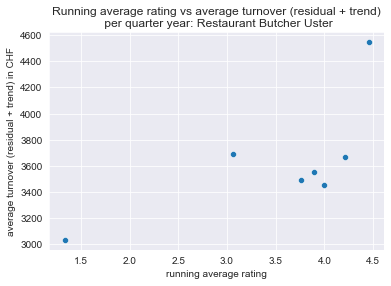

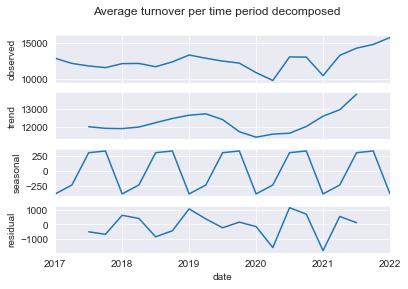


Restaurant: fwg-negishi-metalli

Pearson correlation:
                                residual_plus_trend  \
residual_plus_trend                        1.000000   
average_rating_per_time_period             0.083166   

                                average_rating_per_time_period  
residual_plus_trend                                   0.083166  
average_rating_per_time_period                        1.000000  

Spearman correlation:
                                residual_plus_trend  \
residual_plus_trend                        1.000000   
average_rating_per_time_period            -0.063725   

                                average_rating_per_time_period  
residual_plus_trend                                  -0.063725  
average_rating_per_time_period                        1.000000  


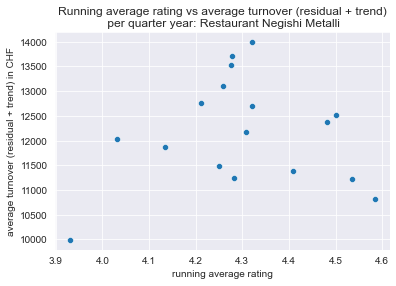

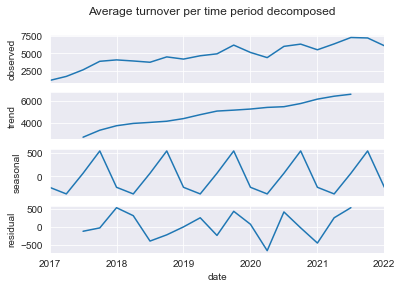


Restaurant: fwg-butcher-aarbergergasse

Pearson correlation:
                                residual_plus_trend  \
residual_plus_trend                         1.00000   
average_rating_per_time_period             -0.57038   

                                average_rating_per_time_period  
residual_plus_trend                                   -0.57038  
average_rating_per_time_period                         1.00000  

Spearman correlation:
                                residual_plus_trend  \
residual_plus_trend                        1.000000   
average_rating_per_time_period            -0.639706   

                                average_rating_per_time_period  
residual_plus_trend                                  -0.639706  
average_rating_per_time_period                        1.000000  


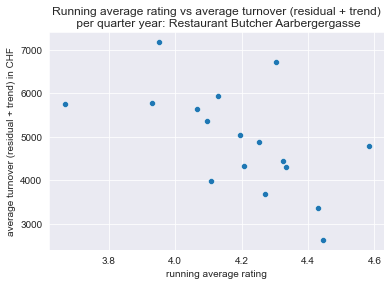

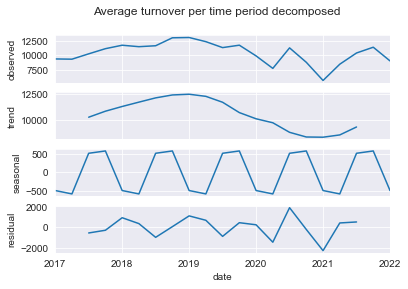


Restaurant: fwg-nooch-aarbergergasse

Pearson correlation:
                                residual_plus_trend  \
residual_plus_trend                        1.000000   
average_rating_per_time_period             0.448859   

                                average_rating_per_time_period  
residual_plus_trend                                   0.448859  
average_rating_per_time_period                        1.000000  

Spearman correlation:
                                residual_plus_trend  \
residual_plus_trend                        1.000000   
average_rating_per_time_period             0.365196   

                                average_rating_per_time_period  
residual_plus_trend                                   0.365196  
average_rating_per_time_period                        1.000000  


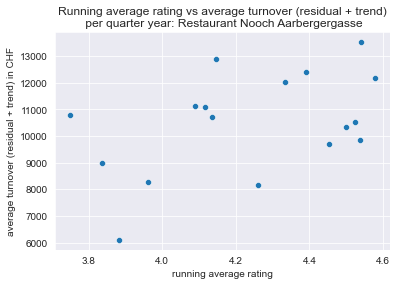

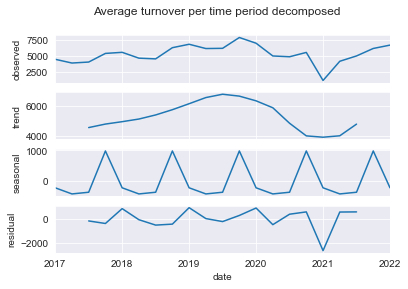


Restaurant: fwg-nooch-barfi

Pearson correlation:
                                residual_plus_trend  \
residual_plus_trend                        1.000000   
average_rating_per_time_period             0.420152   

                                average_rating_per_time_period  
residual_plus_trend                                   0.420152  
average_rating_per_time_period                        1.000000  

Spearman correlation:
                                residual_plus_trend  \
residual_plus_trend                        1.000000   
average_rating_per_time_period             0.098039   

                                average_rating_per_time_period  
residual_plus_trend                                   0.098039  
average_rating_per_time_period                        1.000000  


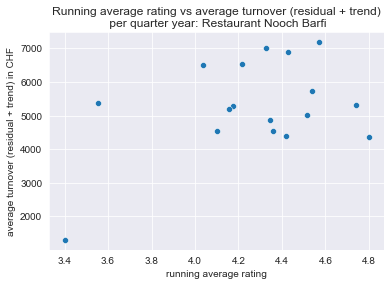

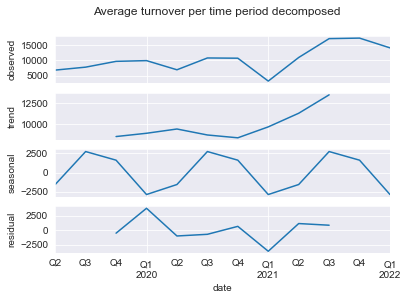


Restaurant: fwg-missmiu-europaallee

Pearson correlation:
                                residual_plus_trend  \
residual_plus_trend                        1.000000   
average_rating_per_time_period            -0.437401   

                                average_rating_per_time_period  
residual_plus_trend                                  -0.437401  
average_rating_per_time_period                        1.000000  

Spearman correlation:
                                residual_plus_trend  \
residual_plus_trend                        1.000000   
average_rating_per_time_period            -0.190476   

                                average_rating_per_time_period  
residual_plus_trend                                  -0.190476  
average_rating_per_time_period                        1.000000  


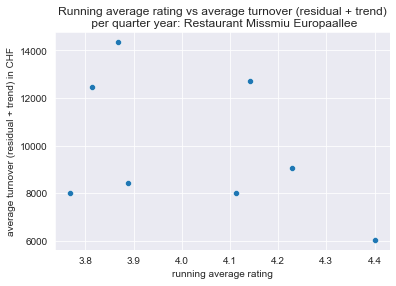

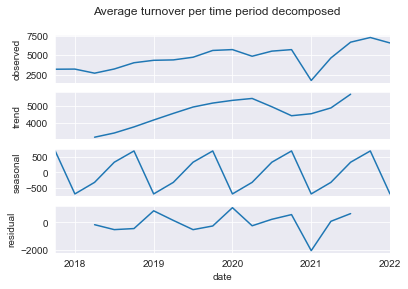


Restaurant: fwg-nooch-mallofSwitzerland

Pearson correlation:
                                residual_plus_trend  \
residual_plus_trend                        1.000000   
average_rating_per_time_period             0.056234   

                                average_rating_per_time_period  
residual_plus_trend                                   0.056234  
average_rating_per_time_period                        1.000000  

Spearman correlation:
                                residual_plus_trend  \
residual_plus_trend                        1.000000   
average_rating_per_time_period            -0.046154   

                                average_rating_per_time_period  
residual_plus_trend                                  -0.046154  
average_rating_per_time_period                        1.000000  


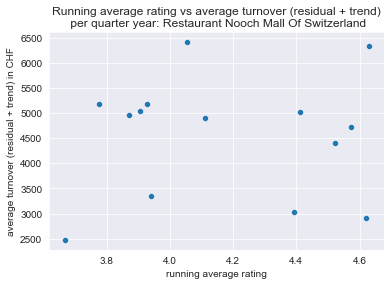

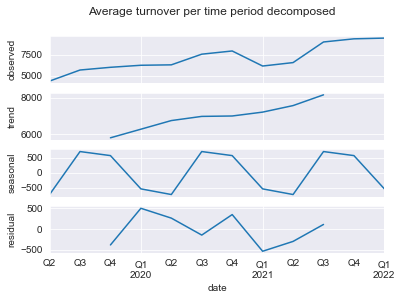


Restaurant: fwg-nooch-mattenhof

Pearson correlation:
                                residual_plus_trend  \
residual_plus_trend                        1.000000   
average_rating_per_time_period             0.103514   

                                average_rating_per_time_period  
residual_plus_trend                                   0.103514  
average_rating_per_time_period                        1.000000  

Spearman correlation:
                                residual_plus_trend  \
residual_plus_trend                        1.000000   
average_rating_per_time_period             0.404762   

                                average_rating_per_time_period  
residual_plus_trend                                   0.404762  
average_rating_per_time_period                        1.000000  


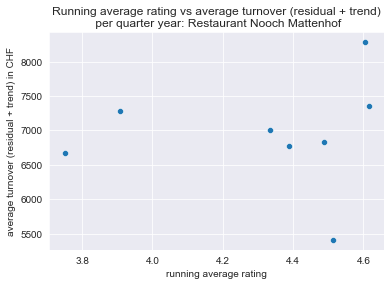

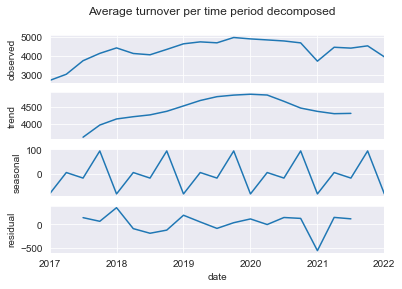


Restaurant: fwg-butcher-metalli

Pearson correlation:
                                residual_plus_trend  \
residual_plus_trend                        1.000000   
average_rating_per_time_period             0.289725   

                                average_rating_per_time_period  
residual_plus_trend                                   0.289725  
average_rating_per_time_period                        1.000000  

Spearman correlation:
                                residual_plus_trend  \
residual_plus_trend                        1.000000   
average_rating_per_time_period            -0.071078   

                                average_rating_per_time_period  
residual_plus_trend                                  -0.071078  
average_rating_per_time_period                        1.000000  


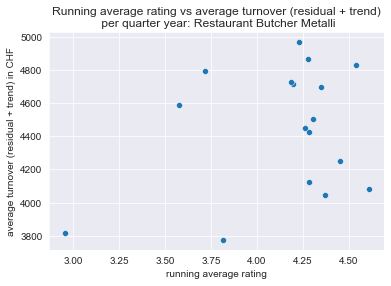

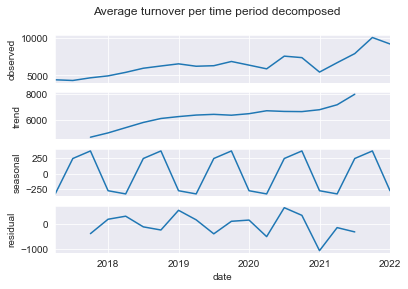


Restaurant: fwg-negishi-pilatusstrasse

Pearson correlation:
                                residual_plus_trend  \
residual_plus_trend                        1.000000   
average_rating_per_time_period             0.144111   

                                average_rating_per_time_period  
residual_plus_trend                                   0.144111  
average_rating_per_time_period                        1.000000  

Spearman correlation:
                                residual_plus_trend  \
residual_plus_trend                        1.000000   
average_rating_per_time_period             0.225166   

                                average_rating_per_time_period  
residual_plus_trend                                   0.225166  
average_rating_per_time_period                        1.000000  


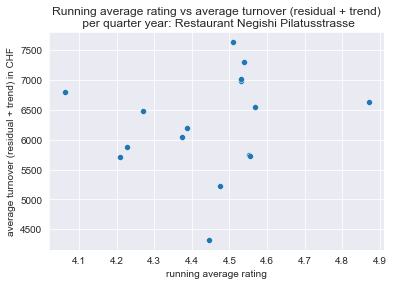

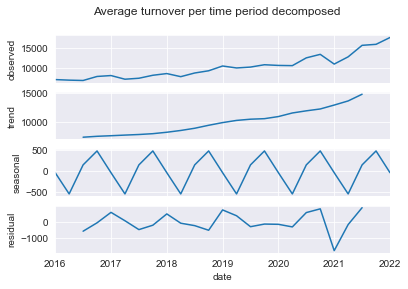


Restaurant: fwg-nooch-richti

Pearson correlation:
                                residual_plus_trend  \
residual_plus_trend                        1.000000   
average_rating_per_time_period            -0.030565   

                                average_rating_per_time_period  
residual_plus_trend                                  -0.030565  
average_rating_per_time_period                        1.000000  

Spearman correlation:
                                residual_plus_trend  \
residual_plus_trend                        1.000000   
average_rating_per_time_period            -0.132511   

                                average_rating_per_time_period  
residual_plus_trend                                  -0.132511  
average_rating_per_time_period                        1.000000  


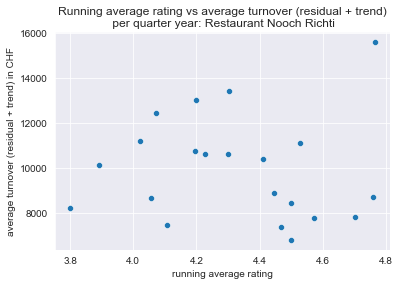

Couldn't perform decompose and compute correlation for fwg-outback-stad


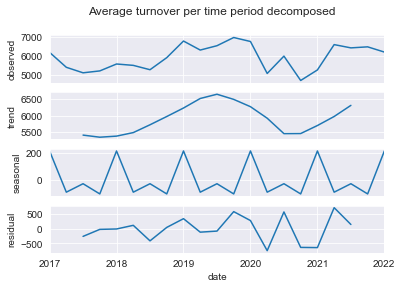


Restaurant: fwg-negishi-steinen

Pearson correlation:
                                residual_plus_trend  \
residual_plus_trend                        1.000000   
average_rating_per_time_period             0.042068   

                                average_rating_per_time_period  
residual_plus_trend                                   0.042068  
average_rating_per_time_period                        1.000000  

Spearman correlation:
                                residual_plus_trend  \
residual_plus_trend                        1.000000   
average_rating_per_time_period             0.074801   

                                average_rating_per_time_period  
residual_plus_trend                                   0.074801  
average_rating_per_time_period                        1.000000  


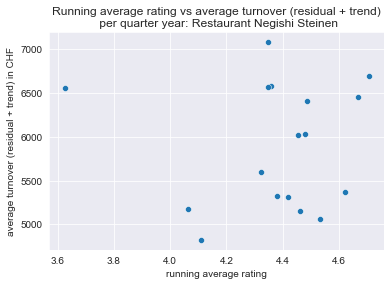

Couldn't perform decompose and compute correlation for fwg-nooch-uster


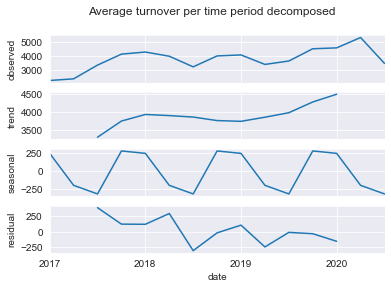


Restaurant: fwg-butcher-zuerichWest

Pearson correlation:
                                residual_plus_trend  \
residual_plus_trend                        1.000000   
average_rating_per_time_period             0.274389   

                                average_rating_per_time_period  
residual_plus_trend                                   0.274389  
average_rating_per_time_period                        1.000000  

Spearman correlation:
                                residual_plus_trend  \
residual_plus_trend                        1.000000   
average_rating_per_time_period             0.036364   

                                average_rating_per_time_period  
residual_plus_trend                                   0.036364  
average_rating_per_time_period                        1.000000  


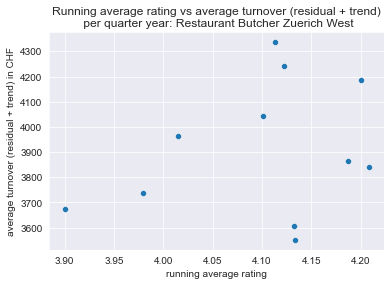

In [2]:
data_type = RestaurantReviewDataType.GOOGLE_REVIEW
time_period = "Q"
# overall rating anfang vom monat <-> umsatzzahl ende vom monat  --> besserer vergleich da kunden zuerst rating sehen müssen
rating_date_offset_in_months = -1
decompose_option = DecomposeOption.RESIDUAL_PLUS_TREND

# TODO: 1. get lineplots of all rest overall rating vs turnover
dataAnalyzer.plot_for_all_restaurants(
    analyzer_option=AnalyzerOption.AVERAGE_RATING_VS_AVERAGE_TURNOVER,
    restaurant_review_data_type=data_type,
    time_period=time_period,
    rating_date_offset_in_months=rating_date_offset_in_months,
    filter_corona_data=True,
    decompose_option=decompose_option)

dataAnalyzer.plot_for_all_restaurants(
    analyzer_option=AnalyzerOption.AVERAGE_RATING_VS_AVERAGE_TURNOVER,
    restaurant_review_data_type=data_type,
    time_period=time_period,
    rating_date_offset_in_months=rating_date_offset_in_months,
    filter_corona_data=False,
    decompose_option=decompose_option)

# TODO: look at correlations overall rating vs turnover
df_pearson_spearman_before_corona = dataAnalyzer.compute_correlation_for_all_restaurants(
    analyzer_option=AnalyzerOption.AVERAGE_RATING_VS_AVERAGE_TURNOVER,
    restaurant_review_data_type=data_type,
    time_period=time_period,
    rating_date_offset_in_months=rating_date_offset_in_months,
    filter_corona_data=True,
    decompose_option=decompose_option)

df_pearson_spearman_with_corona = dataAnalyzer.compute_correlation_for_all_restaurants(
    analyzer_option=AnalyzerOption.AVERAGE_RATING_VS_AVERAGE_TURNOVER,
    restaurant_review_data_type=data_type,
    time_period=time_period,
    rating_date_offset_in_months=rating_date_offset_in_months,
    filter_corona_data=False,
    decompose_option=decompose_option)

In [3]:
from IPython.core.display import display, HTML
import pandas as pd

#data = df_pearson_spearman #pd.DataFrame({"A":[1,2,3,4,5], "B":[10,20,30,40,50]})
for restaurant in Restaurant:
    picture_name_before_corona = DataAnalyzer.get_picture_name(restaurant, filter_corona_data=True)
    """
    df_pearson_spearman_before_corona.loc[df_pearson_spearman_before_corona["restaurant_name"] == picture_name_before_corona,'before_corona'] = \
        '<img src="{}" alt="img">'.format(picture_name_before_corona + "-corr.png")
    """
    df_pearson_spearman_before_corona.loc[df_pearson_spearman_before_corona["restaurant_name"] == picture_name_before_corona,'before_corona'] = \
    '<table><tr><td> <img src="{}" alt="img"></td></tr><tr><td> <img src="{}" alt="img"></td></tr></table>' \
    .format(
        picture_name_before_corona + "-lineplot.png",
        picture_name_before_corona + "-corr.png")

    picture_name_with_corona = DataAnalyzer.get_picture_name(restaurant, filter_corona_data=False)
    """
    df_pearson_spearman_with_corona.loc[df_pearson_spearman_with_corona["restaurant_name"] == picture_name_with_corona,'with_corona'] = \
        '<img src="{}" alt="img">'.format(picture_name_with_corona + "-corr.png")
    """
    df_pearson_spearman_with_corona.loc[df_pearson_spearman_with_corona["restaurant_name"] == picture_name_with_corona,'with_corona'] = \
    '<table><tr><td> <img src="{}" alt="img"></td></tr><tr><td> <img src="{}" alt="img"></td></tr></table>' \
    .format(
        picture_name_with_corona + "-lineplot.png",
        picture_name_with_corona + "-corr.png")
    
df_pearson_spearman_before_corona["pearson_spearman"] = \
    df_pearson_spearman_before_corona["pearson"].map('${:,.2f}'.format).astype(str) + ", " + df_pearson_spearman_before_corona["spearman"].map('${:,.2f}'.format).astype(str)
df_pearson_spearman_with_corona["pearson_spearman"] = \
    df_pearson_spearman_with_corona["pearson"].map('${:,.2f}'.format).astype(str) + ", " + df_pearson_spearman_with_corona["spearman"].map('${:,.2f}'.format).astype(str)
df = pd.DataFrame({#"restaurant_name":[restaurant.value for restaurant in Restaurant],
              "pear_s_before":df_pearson_spearman_before_corona["pearson_spearman"].to_list(),
              "before_corona":df_pearson_spearman_before_corona["before_corona"].to_list(),
              "pear_s_with":df_pearson_spearman_with_corona["pearson_spearman"].to_list(),
              "with_corona":df_pearson_spearman_with_corona["with_corona"].to_list()})

display(HTML(df.to_html(escape=False, index=False)))